# Chapter 8 - Linear Regression

* can **model** the relationship between two variables with a line and give its equation
* correlation tells us how strong the relationship is, but it doesn't tell us what the line is
* the **linear model** is an equation of a straight line through the data
* being a model, it won't match reality exactly, but it can help us understand how the variables are associated

## Residuals

* **predicted value** is the estimate made from a model
* denoted as $\hat{y}$ to distinguish it from the _true_ value $y$
* the difference between an observed value and its predicted value is called the **residual**
* $residual = observed\ value - predicted\ value$
    * a _negative_ value means an _overestimate_
    * a _positive_ value means an _underestimate_

## "Best Fit" Means Least Squares

* some residuals are positive, some negative -- their sums would cancel each other out
* we deal with that by squaring the residual values
* the **line of best fit** is the line for which the sum of the squared residuals is smallest, the **least squares** line

## The Linear Model

* $\hat{y} = b_0 + b_1x$
    * $\hat{y}$: predicted values
    * $b_0$ and $b_1$: **coefficients** of the linear model
    * $b_0$: **intercept**: where the line intercepts the $y$-axis
    * $b_1$: **slope**: how rapidly $\hat{y}$ changes with respect to $x$
* slopes are always expressed in $y$-units per $x$-units; they tell how the $y$-variable changes (in its units) for a one unit change in the $x$-variable
* serves largely as a "starting value" for predictions; particularly when the situation where $x = 0$ is a non-reasonable case.    

## The Least Squares Line

* Need the following to determine the least squares line:
    * correlation ($r$)
    * standard deviations ($s_x$ and $s_y$)
    * means ($\bar{x}$ and $\bar{y}$)
* $b_1 = r\frac{s_y}{s_x}$
* $b_0 = \bar{y} - b_1\bar{x}$

* think in terms of $y$-units per $x$-units
* check the same conditions as checked for correlation:
    * quantitative variables condition
    * straight enough condition
    * outlier condition

## Step-By-Step Example : Calculating a Regression Equation

* plan: state the problem
* variables: identify the variables and report the W's
* check the conditions: plot a scatterplot; quantitative, straight enough, outliers
* mechanics: use summary statistics to find equation of regression line
    * find slope
    * find intercept
    * write equation of model
* conclusion: interpret, discussing in terms of variables and their units    

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
cigarettes = pd.read_table("./data/cigarettes.txt")
cigarettes.head()

,brand,nicotine,tar,CO
0,American Filter,1.2,16,15
1,Benson & Hedges,1.2,16,15
2,Camel,1.0,16,17
3,Capri,0.8,9,6
4,Carlton,0.1,1,1


In [15]:
# get the correlation
r = np.corrcoef(cigarettes.tar, cigarettes.nicotine)[0][1]
r

0.96136856604937804

In [16]:
# calculate b_1 (slope)
b1 = r * (cigarettes.nicotine.std() / cigarettes.tar.std())
b1

0.065051664753157323

In [17]:
# calculate b_0 (intercept)
b0 = cigarettes.nicotine.mean() - b1 * cigarettes.tar.mean()
b0

0.15402985074626818

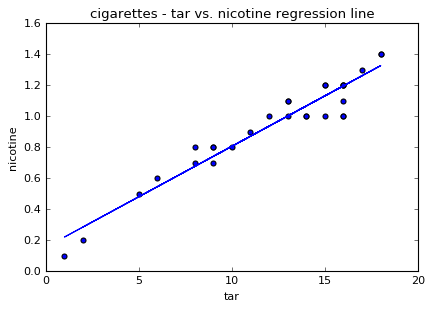

In [18]:
# data points
plt.scatter(cigarettes.tar, cigarettes.nicotine)

# regression line
yhat = b0 + b1 * cigarettes.tar
plt.plot(cigarettes.tar, yhat)

plt.xlabel('tar')
plt.ylabel('nicotine')
plt.title('cigarettes - tar vs. nicotine regression line');

## Correlation and the Line

* If $x$ and $y$ are converted to standard units, and the regression line is plotted:
    * slope ($b_1$) = $r$
    * intercept ($b_0$) = 0
    * equation of line: $\hat{z}_y = rz_x$
* moving one standard deviation from the mean in $x$, we can expect to move $r$ standard deviations from the mean in $y$
* in general, cases that are one standard deviation away from the mean in $x$ are, on average, $r$ standard deviations away from the mean in $y$
* if $r = 0$, there is no linear relationship
* if $r = \pm{}1$, there is a perfect linear relationship 

## How Big Can Predicted Values Get?

* each predicted $y$ tends to be closer to its mean (in standard deviations) than its corresponding $x$ was
* this property of the linear model is called **regression to the mean**
* example:
    * tall men will, on average, have larger shoe sizes
    * short men will, on average, have smaller shoe sizes
    * given a man who's height is 2 SDs above the mean, we would predict his shoe size to fall somewhere between 0SD and 2SD above the mean shoe size
    * if $r$ = 0, the prediction would be the mean shoe size
    * if $r$ = 1, the prediction would be 2SDs above the mean shoe size
    * for an $r$ between 0 and 1, the prediction would fall somewhere between the extremes, tending away from the extreme (2 SDs) towards the mean, based on the actual $r$

## Residuals Revisited

* residuals are the part of the data that hasn't been modeled
* $Residual = Data - Model$
* use $e$ to denote residuals
* $e = y - \hat{y}$
* after fitting a regression line, plot the residuals to confirm there's no pattern
    * scatterplot of $x$-values against residuals should have no interesting features (i.e. direction, shape)
    * it should stretch horizontally with even scatter throughout
    * it should show no bends and no outliers
* many software packages plot residuals against $\hat{y}$, rather than $x$
    * if $r$ is positive, the only difference is the axis values/units
    * if $r$ is negative, the plots are mirror images of each other

In [20]:
residuals = cigarettes.nicotine - yhat
residuals.head()

0    0.005144
1    0.005144
2   -0.194856
3    0.060505
4   -0.119082
dtype: float64

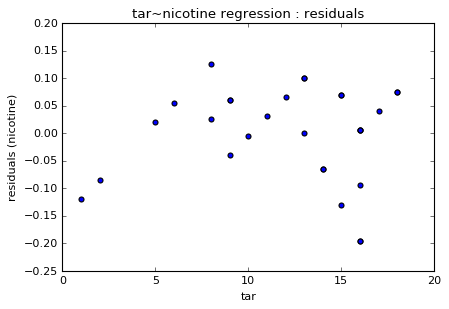

In [22]:
plt.scatter(cigarettes.tar, residuals)
plt.ylabel("residuals (nicotine)")
plt.xlabel("tar")
plt.title("tar~nicotine regression : residuals");

## The Residual Standard Deviation

* standard deviation of the residuals, $s_e$, gives a measure of how much the points spread around the regression line
* this depends on the residuals having even scatter (as shown by the residuals plot noted above)
* this leads to a new assumption: **Equal Variance Assumption**
    * associated condition to check: **Does the Plot Thicken? Condition**
* $s_e = \sqrt{\frac{\sum{e^2}}{n-2}}$
* make a histogram of the residuals

In [33]:
se = np.sqrt((residuals.pow(2).sum() / (residuals.size - 2)))
se

0.087854034738445302

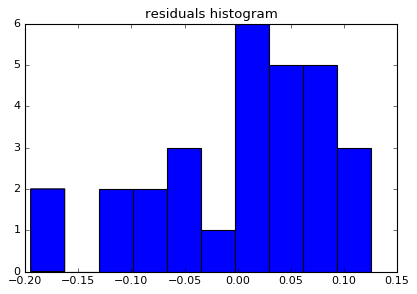

In [35]:
plt.hist(residuals)
plt.title("residuals histogram");

## $R^2$-The Variation Accounted For

* variation in the residuals is key to assessing how well the model fits
* two extremes:
  * $r = 1$: residuals would all be 0 and have no variation
  * $r = 0$: the model would predict the mean of the response for all $x$; the residuals would have the same variability as the response variable
* squared correlation, $r^2$, gives the fraction of the data's variation accounted for by the model
* $1 - r^2$ is the fraction of the original variation left in the residuals
* traditionally denoted as $R^2$
* if $R^2$:
  * = 0 - none of the variance in the data is captured by the model
  * = 1 - all of the variance in the data is captured by the model
* because it's a fraction of the whole, $R^2$ is often given as a percentage
* when interpreting a regression model, _Tell_ what $R^2$ means:
  * > according to our linear model, 76% of the variability in {response variable description} is accounted for by variation in {predictor variable description}.

## How Big Should $R^2$ Be?

* $R^2$ ranges between 0 and 1
* answer depends on kind of data being analyzed, and the goals of the analysis:
* often, standard deviation of the residuals can give more information about the usefulness of the regression, by telling us how much scatter there is around the line
* along with slope and intercept of regression, always report $R^2$ to allow readers to judge for themselves

**Note**: A regression line equation can't be "reversed" or "inverted" (i.e. solving the equation for the _predictor_ variable) to create a model that predicts the $x$-variable as the response to the $y$-variable. 

If that model is desired, the entire modeling process needs to be carried out with the variable roles "reversed" from the original model.

## Regression Assumptions and Conditions

* quantitative variables condition: $x$ and $y$
* linearity assumption: relationship between $x$ and $y$ is linear
  * straight enough condition by checking the scatterplot
  * doesn't need to be perfectly straight, but shouldn't be curved, etc.
* the scatterplot of residuals should show consistent spread
  * "does the plot thicken? condition" - spread of residuals shouldn't increase for larger values of $\hat{y}$
* outlier condition

## Step-by-Step Example: Regression

* plan: state the problem
* variables: name the variables and report the W's
* check conditions for regression
* mechanics: fit a straight line model of the form $\hat{y} = b_0 + b_1x$ to the data
  * find the slope
  * find the intercept
  * write the equation using meaningful variable names
  * state the value of $R^2$
* conclusion: describe what the model says in words and numbers (use variable names and units)
  * "$b_1$ $y$-units per $x$-unit", etc.
  * e.g. "The slope says that cereals have 2.5 more calories per gram of Sugar"
  * e.g. "The intercept predicts that sugar-free cereals would average about 89.5 calories"
  * e.g. "The $R^2$ says that 31.8% of the variability in Calories is accounted for by variation in Sugar content."
* find the standard deviation of the residuals, $s_e$, and compare it to the original, $s_y$
  * e.g. "$s_e = 16.2 calories$.  That's smaller than the original SD of 19.5, but still fairly high."
* check again: review the plot of residuals - best check for additional patterns and quirks in the data
  * e.g. "The residuals show a horizontal direction, a shapeless form, and roughly equal scatter for all predicted values.  The linear model appears to be appropriate."

## Reality Check

* if results are surprising, ask whether the regression equation is _plausible_:
  * is the direction of the slope reasonable?
  * is the size of the slope reasonable?
    * if you were to decrease the slope by a factor of 10, would it still be reasonable?
    * if you were to increase the slope by a factor of 10, would it still be reasonble?
    * if the answer to both is "No", then the current slope is at least _plausible_  

## What Can Go Wrong?

* Don't fit a straight line to a nonlinear relationship.
* Beware of extraordinary points.  This could be either extreme $y$ values or $x$ values.
* Don't invert the regression.
* Don't extrapolate beyond the data.
* Don't infer that $x$ causes $y$ just because there is a good linear model for their relationship.
* Don't choose a model based on $R^2$ alone.
  * a high $R^2$ does not demonstrate the _appropriateness_ of a regression model
  * outliers and clustered groups of points are two cases where $R^2$ can be high, but the model is inappropriate
  * outliers can also cause a lowered $R^2$ even though most of the data fall roughly along the regression line

## What Have We Learned

* [p. 197]